# Example 14.6: Adiabatic Mixing

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
Return air with a temperature of $27^\circ\mathrm{C}$, a relative humidity of $60\%$ and a volumetric flow rate of $25\ \mathrm{m^3/min}$ is mixed with $15\ \mathrm{m^3/min}$ of outside air with a temperature of $5^\circ\mathrm{C}$ and relative humidity of $20\%$. Determine the exit temperature, relative humidity, and volumetric flow rate.

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074219&node=10465121&a=1675657733&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.humidair_default import *

### Given

In [4]:
p_surr = Quantity(1,'atm')

# State 1 - Inlet
T[1] = Quantity(27,'degC')
rel_hum[1] = Quantity(0.6,'')
Vdot[1] = Quantity(25,'m^3/min')

# State 2 - Exit
T[2] = Quantity(5,'degC')
rel_hum[2] = Quantity(0.2,'')
Vdot[2] = Quantity(15,'m^3/min')

Summary();

<IPython.core.display.Latex object>

,$T$ [°C],$\dot{V}$ [m³/s],$rel_{hum}$ []
1,27,0.416667,0.6
2,5,0.250000,0.2


In [5]:
states.fix(1, humidair, T=T[1], rel_hum=rel_hum[1])
states.fix(2, humidair, T=T[2], rel_hum=rel_hum[2])

Summary();

<IPython.core.display.Latex object>

,$T$ [°C],$v$ [m³/kg_a],$h$ [kJ/kg_a],$s$ [kJ/K/kg_a],$\dot{V}$ [m³/s],$T_{wb}$ [°C],$T_{dp}$ [°C],$rel_{hum}$ [],$\omega$ [kg_water/kg_a]
1,27,0.868404,61.542624,0.218969,0.416667,21.202464,18.579487,0.6,0.013483
2,5,0.788904,7.732413,0.029265,0.250000,-1.430624,-14.413276,0.2,0.001077


#### Exit properties

In [6]:
%%showcalc
"Mass flow rates"
mdot_a[1] = Vdot[1]/v[1]
mdot_a[2] = Vdot[2]/v[2]
mdot_a[3] = mdot_a[1] + mdot_a[2]

"1st Law"
h[3] = (mdot_a[1]*h[1] + mdot_a[2]*h[2])/(mdot_a[3])

"Water Balance"
omega[3] = (mdot_a[1]*omega[1] + mdot_a[2]*omega[2])/(mdot_a[3])

"Exit Temperature"
T[3] = humidair.T(h=h[3],omega=omega[3])
rel_hum[3] = humidair.rel_hum(h=h[3],omega=omega[3])

Mass flow rates
\begin{align}
  {\dot{m}_{a}}_{ {{1}} } &=  \frac{ {\dot{V}}_{ {{1}} } }{ {v}_{ {{1}} } } \\
    &= \frac{ 0.41667\ \frac{\mathrm{m}^{3}}{\mathrm{s}} }{ 0.8684\ \frac{\mathrm{m}^{3}}{\mathrm{kg\_a}} }\\
    &= 0.47981\ \frac{\mathrm{kg\_a}}{\mathrm{s}}
\end{align}

\begin{align}
  {\dot{m}_{a}}_{ {{2}} } &=  \frac{ {\dot{V}}_{ {{2}} } }{ {v}_{ {{2}} } } \\
    &= \frac{ 0.25\ \frac{\mathrm{m}^{3}}{\mathrm{s}} }{ 0.7889\ \frac{\mathrm{m}^{3}}{\mathrm{kg\_a}} }\\
    &= 0.3169\ \frac{\mathrm{kg\_a}}{\mathrm{s}}
\end{align}

\begin{align}
  {\dot{m}_{a}}_{ {{3}} } &=  {\dot{m}_{a}}_{ {{1}} } + {\dot{m}_{a}}_{ {{2}} } \\
    &= 0.47981\ \frac{\mathrm{kg\_a}}{\mathrm{s}} + 0.3169\ \frac{\mathrm{kg\_a}}{\mathrm{s}}\\
    &= 0.7967\ \frac{\mathrm{kg\_a}}{\mathrm{s}}
\end{align}

1st Law
\begin{align}
  {h}_{ {{3}} } &=  \frac{  {\dot{m}_{a}}_{ {{1}} }  \cdot  {h}_{ {{1}} }  +  {\dot{m}_{a}}_{ {{2}} }  \cdot  {h}_{ {{2}} }  }{ {\dot{m}_{a}}_{ {{3}} } } \\
    &= \frac{  0.47981\ \frac{\mathrm{kg\_a}}{\mathrm{s}}  \cdot  61.543\ \frac{\mathrm{kJ}}{\mathrm{kg\_a}}  +  0.3169\ \frac{\mathrm{kg\_a}}{\mathrm{s}}  \cdot  7.7324\ \frac{\mathrm{kJ}}{\mathrm{kg\_a}}  }{ 0.7967\ \frac{\mathrm{kg\_a}}{\mathrm{s}} }\\
    &= 40.139\ \frac{\mathrm{kJ}}{\mathrm{kg\_a}}
\end{align}

Water Balance
\begin{align}
  {\omega}_{ {{3}} } &=  \frac{  {\dot{m}_{a}}_{ {{1}} }  \cdot  {\omega}_{ {{1}} }  +  {\dot{m}_{a}}_{ {{2}} }  \cdot  {\omega}_{ {{2}} }  }{ {\dot{m}_{a}}_{ {{3}} } } \\
    &= \frac{  0.47981\ \frac{\mathrm{kg\_a}}{\mathrm{s}}  \cdot  0.013483\ \frac{\mathrm{kg\_water}}{\mathrm{kg\_a}}  +  0.3169\ \frac{\mathrm{kg\_a}}{\mathrm{s}}  \cdot  0.0010774\ \frac{\mathrm{kg\_water}}{\mathrm{kg\_a}}  }{ 0.7967\ \frac{\mathrm{kg\_a}}{\mathrm{s}} }\\
    &= 0.0085487\ \frac{\mathrm{kg\_water}}{\mathrm{kg\_a}}
\end{align}

Exit Temperature
\begin{align}
  {T}_{ {{3}} } &=  \mathrm{ \underset{ humidair }{ T } }\left( \mathrm{ h } = {h}_{ {{3}} }, \mathrm{ omega } = {\omega}_{ {{3}} } \right)  = \mathrm{ \underset{ humidair }{ T } }\left( \mathrm{ h } = 40.139\ \frac{\mathrm{kJ}}{\mathrm{kg\_a}}, \mathrm{ omega } = 0.0085487\ \frac{\mathrm{kg\_water}}{\mathrm{kg\_a}} \right) = 18.369\ \mathrm{°C}
\end{align}

\begin{align}
  {rel_{hum}}_{ {{3}} } &=  \mathrm{ \underset{ humidair }{ rel\_hum } }\left( \mathrm{ h } = {h}_{ {{3}} }, \mathrm{ omega } = {\omega}_{ {{3}} } \right)  = \mathrm{ \underset{ humidair }{ rel\_hum } }\left( \mathrm{ h } = 40.139\ \frac{\mathrm{kJ}}{\mathrm{kg\_a}}, \mathrm{ omega } = 0.0085487\ \frac{\mathrm{kg\_water}}{\mathrm{kg\_a}} \right) = 0.64747
\end{align}



### Psychrometric Chart

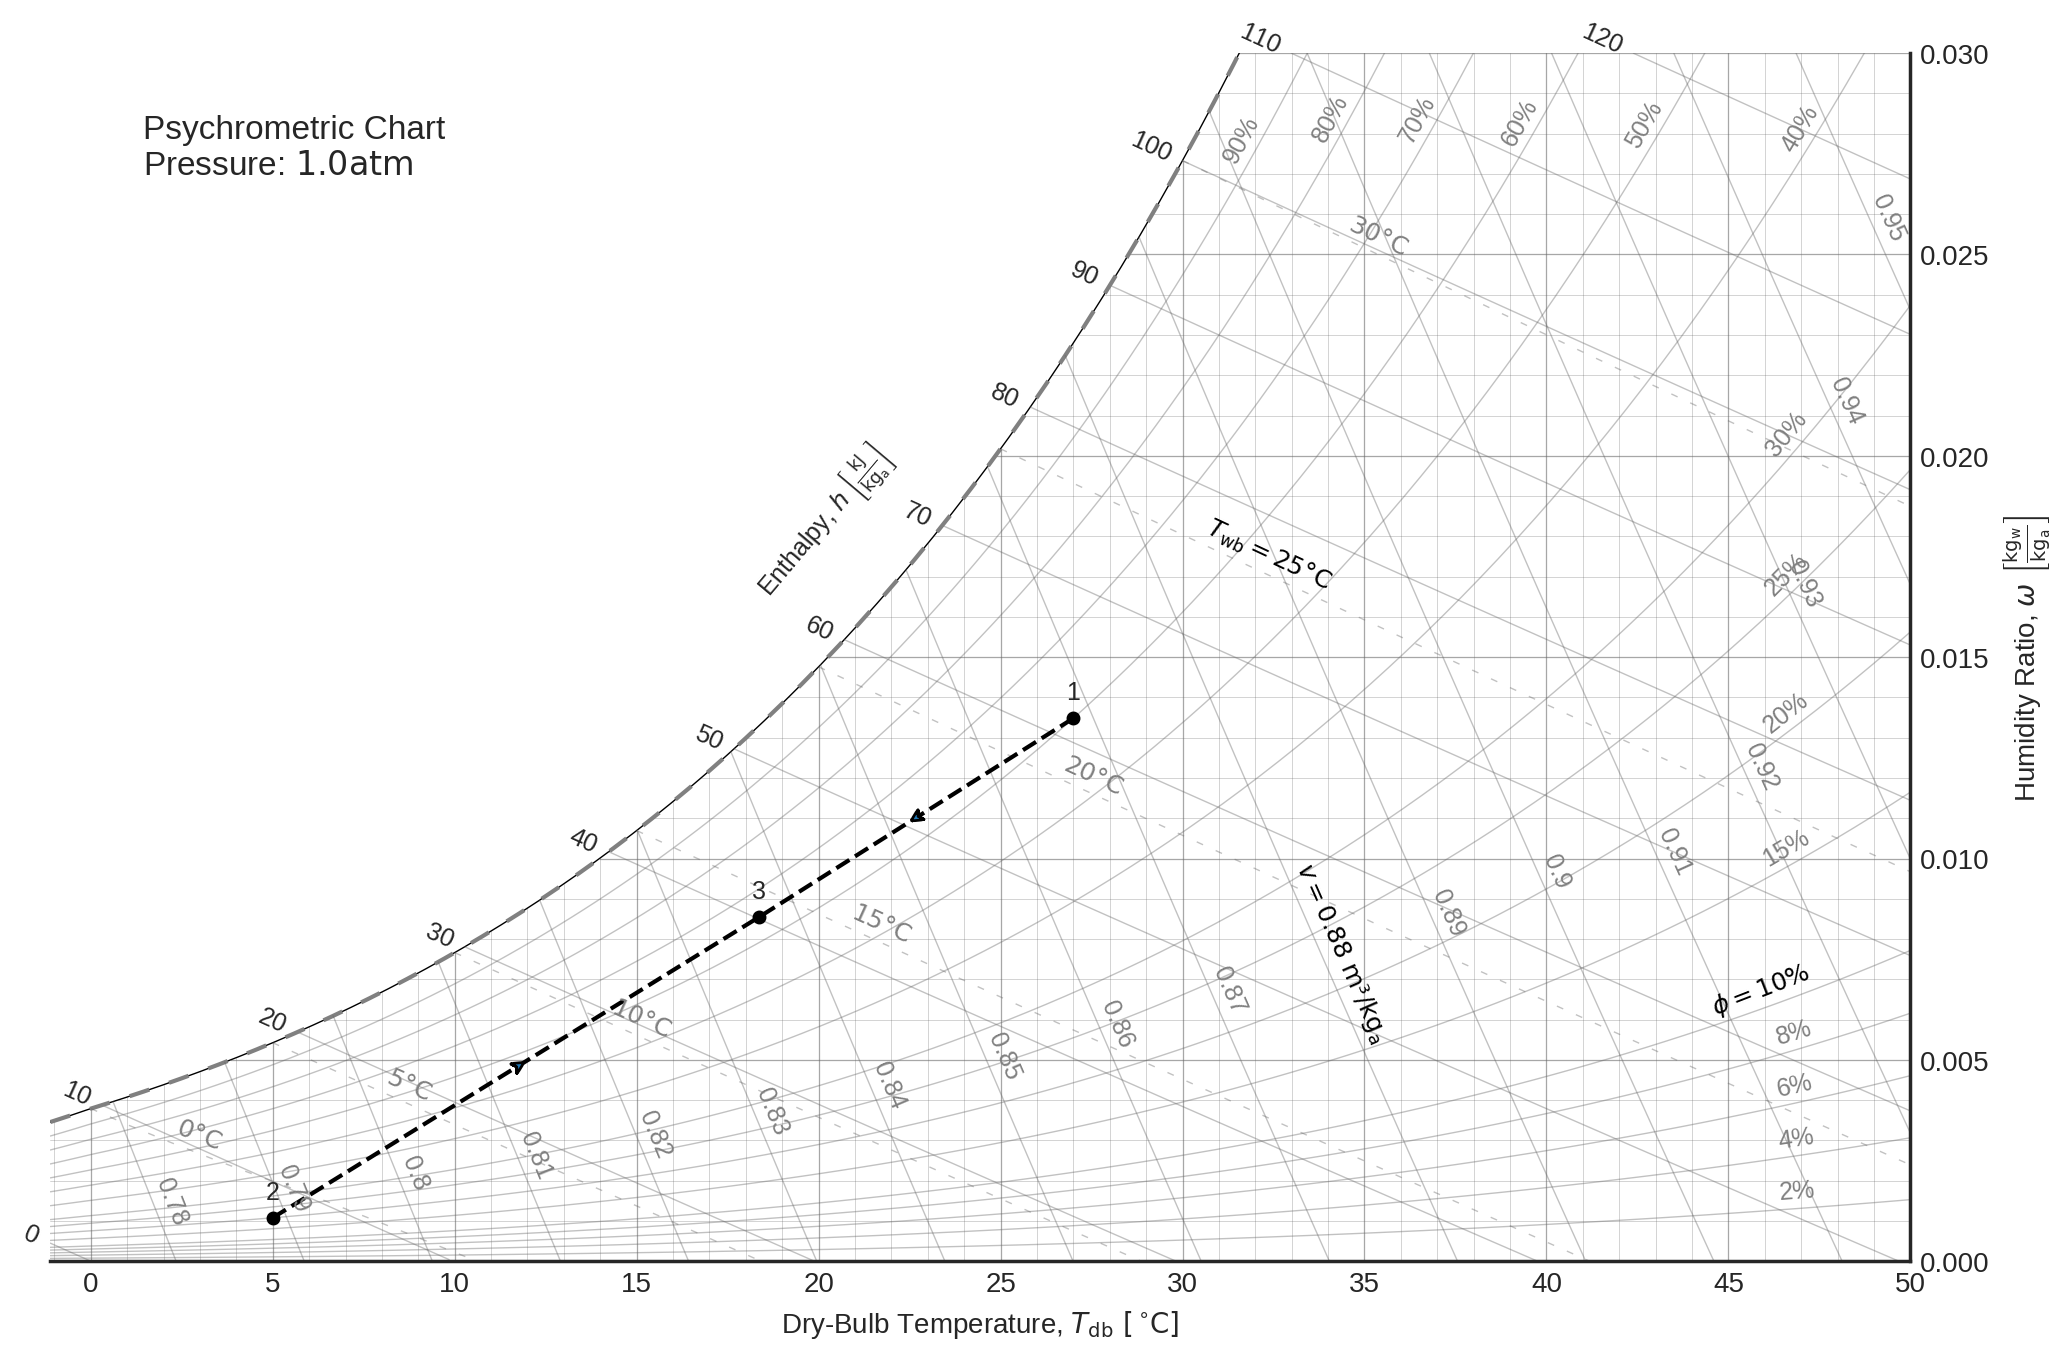

In [7]:
psych = humidair.psychrometric_chart(redraw=False)

# Plot States
psych.plot_state(states[1])
psych.plot_state(states[2])
psych.plot_state(states[3])

# Plot Processes
psych.plot_process(states[1],states[3])
psych.plot_process(states[2],states[3]);

In [9]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-input --no-prompt "Ex14.6 Adiabatic Mixing.ipynb"